In [10]:
import numpy as np
from sklearn.utils import shuffle
import math
import time
import matplotlib.pyplot as plt

In [2]:
x = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw4/q1/data/features.txt", delimiter = ','))
y = np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw4/q1/data/target.txt", delimiter = ',')

In [3]:
def get_determinant(w, x, y, b):
    return((x.dot(w)+ np.repeat(b, x.shape[0]).dot(y)))

def leave_only_less_than_one(v):
    new_v = v
    for i in range(len(v)):
        if v[0,i] > 1:
            new_v[0,i] = 0
        else:
            new_v[0,i] = 1 - v[0,i]
    return(new_v)   

def get_cost(w, x, y, b, C):
    return(1/2*pow(np.linalg.norm(w),2) + C * leave_only_less_than_one(get_determinant(w, x, y, b)).sum())

def cost_change(cost_prior, cost_after):
    return(np.true_divide(abs(cost_prior-cost_after)*100, cost_prior))

In [4]:
# 1. Batch Gradient Descent (BGD)

eta_BGD = 3*pow(10, -7)
epsilon_BGD = 0.25
w = np.repeat(0, x.shape[1])
b = 0
C = 100
k = 0
change_BGD = 100 # random number that's bigger than epsilon
new_w = w
cost_list_BGD = list()

startT = time.time()
while change_BGD > epsilon_BGD:
    cost_prior = get_cost(w, x, y, b, C)
    v_det = get_determinant(w, x, y, b)

    for i in range(x.shape[1]):
        w_temp = 0
        b_temp = 0
        for l in range(len(v_det)):
            if v_det[0,l] >= 1:
                w_temp += 0
                b_temp += 0
            else:
                w_temp += -y[i]*x[i,l]
                b_temp += -y[i]
        new_w[i] = w[i] - eta_BGD * (w[i] + C * w_temp)
    
    w = new_w
    b = b - eta_BGD * C * b_temp
    k = k + 1
    cost_after = get_cost(w, x, y, b, C)
    cost_list_BGD.append((k, cost_after))
    
    change_BGD = cost_change(cost_prior, cost_after)

endT = time.time()
print(k, endT - startT)

12 0.11562800407409668


In [5]:
# 2. Stochastic Gradient Descent (SGD) 500-3000
x, y = shuffle(x, y, random_state=0)

eta_SGD = 0.0001
epsilon_SGD = 0.001

w = np.repeat(0, x.shape[1])
b = 0
k = 0
i = 1
C = 100
new_w = w
last_change = 0 # set the initial change as 0
change_SGD = 100 # random as long as it's bigger than eta
cost_list_SGD = list()

startT = time.time()
while change_SGD > epsilon_SGD:
    
    cost_prior = get_cost(w, x, y, b, C)
    scalar_det = get_determinant(w, x[i-1], y[i-1], b).sum()
    
    if scalar_det >= 1:
        w_temp = 0
        b_temp = 0
    else:
        w_temp = np.array(-y[i-1] * x[i-1, :])[0]
        b_temp = -y[i-1]
        
    new_w = w - eta_SGD * (w + (C * w_temp))
    w = new_w
    b = b - eta_SGD * C * b_temp
    
    if k == 0:
        cost_prior = 100
    
    cost_after = get_cost(w, x, y, b, C)
    change_SGD = 0.5*last_change + 0.5*cost_change(cost_prior, cost_after)
    last_change = change_SGD
    
    cost_list_SGD.append((k, cost_after))
    
    k += 1
    i = (i % x.shape[0]) + 1

endT = time.time()
print(k, endT-startT)

49793 76.39243602752686


In [6]:
# 3. Mini-Batch Gradient Descent (MBGD)

x, y = shuffle(x, y, random_state=0)

k = 0
epsilon_MBGD = 0.01
eta_MBGD = pow(10, -5)
w = np.repeat(0, x.shape[1])
new_w = w
b = 0
C = 100
B = 20
l = 0

change_MBGD = 100 # random number as long as it's bigger than epsilon
last_change = 0
cost_list_MBGD = list()

startT = time.time()
while change_MBGD > epsilon_MBGD:
    
    cost_prior = get_cost(w, x, y, b, C)
    start = l*B + 1
    end = min(x.shape[0], (l+1)*B)
    
    mb_det = get_determinant(w, x[start:end], y[start:end], b)
    
    for j in range(x.shape[1]):
        w_temp = 0
        b_temp = 0
        for t in range(len(mb_det)):
            if mb_det[0,t] >= 1:
                w_temp += 0
                b_temp += 0
            else:
                w_temp += -y[start+t]*x[start+t,j]
                b_temp += -y[start+t]
        new_w[j] = w[j] - eta_MBGD * (w[j] + C * w_temp)
    
    w = new_w
    b = b - eta_MBGD * C * b_temp
    k += 1
    l = (l + 1) % math.ceil(x.shape[0]/B)
    
    if k == 0:
        last_change = 0
    
    cost_after = get_cost(w, x, y, b, C)
    change_MBGD = 0.5*last_change + 0.5*cost_change(cost_prior, cost_after)
    last_change = change_MBGD
    
    cost_list_MBGD.append((k, cost_after))

endT = time.time()
print(k, endT-startT)

243 0.6887521743774414


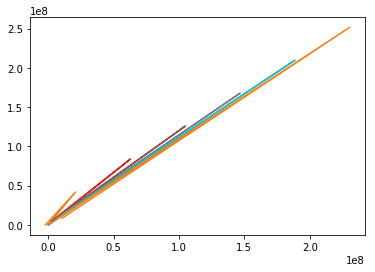

In [15]:
plt.plot(*zip(cost_list_BGD, cost_list_SGD, cost_list_MBGD))
plt.show()

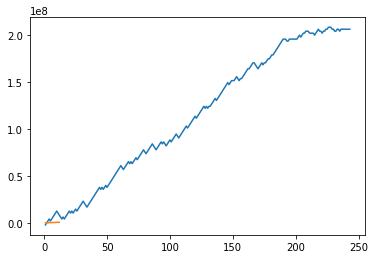

In [18]:
plt.plot(*zip(*cost_list_MBGD))

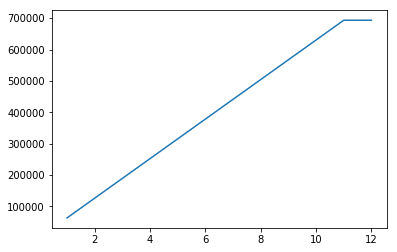

In [24]:
plt.plot(*zip(*cost_list_BGD))
plt.show()

In [23]:
cost_list_BGD

[(1, 63117.13600000005),
 (2, 126134.2720000001),
 (3, 189151.40799999982),
 (4, 252168.5440000002),
 (5, 315185.67999999993),
 (6, 378202.81599999964),
 (7, 441219.95200000016),
 (8, 504237.0880000004),
 (9, 567254.2239999995),
 (10, 630271.3599999999),
 (11, 693296.6040000002),
 (12, 693296.6040000002)]

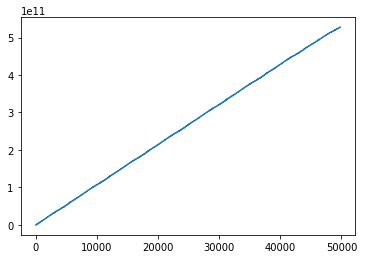

In [28]:
plt.plot(*zip(*cost_list_SGD))
plt.show()

In [26]:
cost_list_SGD[1:10]

[(1, 41947339.21559984),
 (2, 62913876.28147791),
 (3, 83878772.59294903),
 (4, 104847330.31418836),
 (5, 125811101.07945506),
 (6, 146780980.36654428),
 (7, 167747618.56620383),
 (8, 188717577.99934283),
 (9, 209684672.33793667)]